In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
print(df.shape)
print(df.columns)
df.head()

(2121, 7)
Index(['ni_load', 'fe_load', 'co_load', 'mn_load', 'ce_load', 'la_load',
       'overpotential'],
      dtype='object')


,ni_load,fe_load,co_load,mn_load,ce_load,la_load,overpotential
0,0.1,0.2,0.6,0.1,0.0,0.0,0.396193
1,0.0,0.3,0.5,0.0,0.2,0.0,0.379979
2,0.2,0.0,0.4,0.3,0.0,0.1,0.414406
3,0.1,0.0,0.4,0.0,0.1,0.4,0.410658
4,0.2,0.1,0.0,0.5,0.0,0.2,0.374932


In [8]:
for col in df.columns[:-1]:
    print(col)
    print(np.sort(df[col].unique()))
    print('')

ni_load
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

fe_load
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

co_load
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

mn_load
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

ce_load
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

la_load
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]



1000000

In [3]:
feature_names = [' Ni.PM.Loading', ' Fe.PM.Loading', ' Co.PM.Loading', 
                 ' Mn.PM.Loading', ' Ce.PM.Loading', ' La.PM.Loading']
replace = ['ni_load',  'fe_load', 'co_load', 'mn_load', 'ce_load', 'la_load']
target_names = ' Eta.V_ave'

In [16]:
features = {}

for name, rep_name in zip(feature_names, replace):
    vals = df[name].values
    features[rep_name] = vals
    



In [17]:
targs = df[target_names].values
features['overpotential'] = targs

In [23]:
df_olymp = pd.DataFrame(features)
print(df_olymp.shape)
print(df_olymp.columns)
df_olymp.head()

(2121, 7)
Index(['ni_load', 'fe_load', 'co_load', 'mn_load', 'ce_load', 'la_load',
       'overpotential'],
      dtype='object')


,ni_load,fe_load,co_load,mn_load,ce_load,la_load,overpotential
0,0.1,0.2,0.6,0.1,0.0,0.0,0.396193
1,0.0,0.3,0.5,0.0,0.2,0.0,0.379979
2,0.2,0.0,0.4,0.3,0.0,0.1,0.414406
3,0.1,0.0,0.4,0.0,0.1,0.4,0.410658
4,0.2,0.1,0.0,0.5,0.0,0.2,0.374932


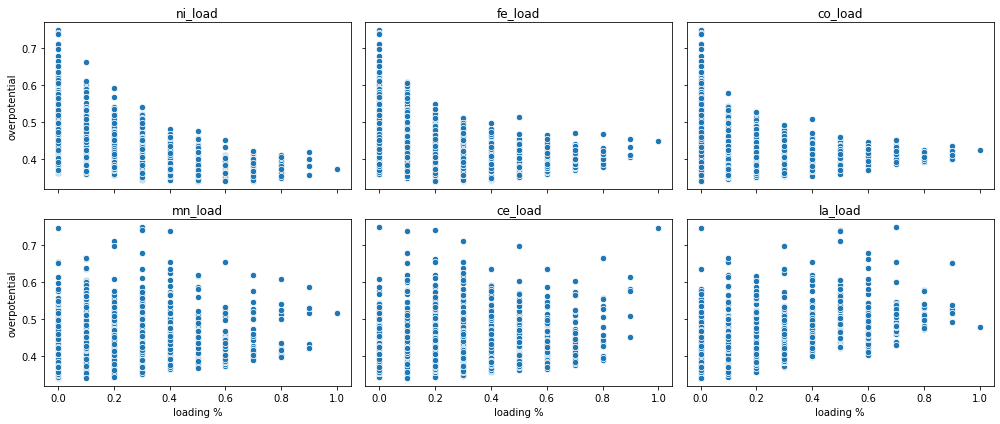

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=True, sharey=True)
axes = axes.flatten()

for ix, name in enumerate(replace):
    
    sns.scatterplot(df_olymp[name].values, df_olymp['overpotential'], ax=axes[ix],s=40)
    axes[ix].set_title(name)
    

axes[3].set_xlabel('loading %')
axes[4].set_xlabel('loading %')
axes[5].set_xlabel('loading %')

plt.tight_layout()
plt.savefig('oer_plate_3496.png', dpi=300)

In [33]:
df_olymp.to_csv('data_olymp.csv', index=False)